# Analysis

In [1]:
# Make the project root folder accessible
from domino.utils.jupyter import notebook_init
notebook_init()

In [2]:
import os.path
import pandas as pd
np = pd.np

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

In [3]:
# Read the processed data
df = pd.read_csv(os.path.join('data', 'players.csv'))

In [4]:
df.head()

,aerialWonPerGame,ap,assistTotal,goal,manOfTheMatch,minsPlayed,passSuccess,player_name,player_url,team_url,...,pos_GK,pos_AM(C),pos_D(C),pos_AM(R),pos_DMC,pos_D(R),pos_AM(CL),pos_D(CLR),pos_M(CL),team
0,0.2,31,16.0,26.0,13.0,2730.0,81.9,Lionel Messi,https://www.whoscored.com/Players/11119,https://www.whoscored.com/Teams/65,...,False,False,False,False,False,False,False,False,False,Barcelona
1,0.6,34,12.0,24.0,7.0,3057.0,80.9,Neymar,https://www.whoscored.com/Players/50835,https://www.whoscored.com/Teams/65,...,False,False,False,False,False,False,False,False,False,Barcelona
2,0.9,21,10.0,19.0,5.0,1741.0,79.9,Gareth Bale,https://www.whoscored.com/Players/13812,https://www.whoscored.com/Teams/52,...,False,False,False,False,False,False,False,False,False,Real Madrid
3,0.4,35,16.0,40.0,8.0,3150.0,73.1,Luis Suárez,https://www.whoscored.com/Players/22221,https://www.whoscored.com/Teams/65,...,False,False,False,False,False,False,False,False,False,Barcelona
4,1.6,36,11.0,35.0,8.0,3185.0,79.4,Cristiano Ronaldo,https://www.whoscored.com/Players/5583,https://www.whoscored.com/Teams/52,...,False,False,False,False,False,False,False,False,False,Real Madrid


### Basic statistics

In [5]:
# Get some statistics of some columns of the data
df[
    [
        'aerialWonPerGame', 'ap', 'assistTotal', 'goal', 
        'manOfTheMatch', 'minsPlayed', 'passSuccess'
    ]
].describe()

,aerialWonPerGame,ap,assistTotal,goal,manOfTheMatch,minsPlayed,passSuccess
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.995064,15.299817,1.394881,1.853748,0.694698,1371.606947,74.771298
std,0.853110,11.179261,2.263221,4.177890,1.407733,973.771538,11.521064
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.300000,5.000000,0.000000,0.000000,0.000000,505.500000,70.350000
50%,0.800000,14.000000,0.000000,0.000000,0.000000,1234.000000,76.900000
75%,1.500000,25.000000,2.000000,2.000000,1.000000,2208.000000,81.850000
max,4.800000,38.000000,16.000000,40.000000,13.000000,3420.000000,100.000000


### Goals per player

In [6]:
goals_per_player = df.groupby('goal').size()

goals_per_player

goal
0.0     299
1.0      91
2.0      54
3.0      25
4.0      12
5.0      16
6.0       6
7.0      13
8.0       3
9.0       5
10.0      1
11.0      2
12.0      4
13.0      2
14.0      1
16.0      2
17.0      1
18.0      1
19.0      2
20.0      1
22.0      1
24.0      2
26.0      1
35.0      1
40.0      1
dtype: int64

In [7]:
# Add 0 to numGoals that don't exist
goals_per_player = goals_per_player.reindex(np.arange(goals_per_player.index.max() + 1)).fillna(0)

In [8]:
# The index are floats; for better viz, better transform it to ints
goals_per_player.index = goals_per_player.index.astype(int)

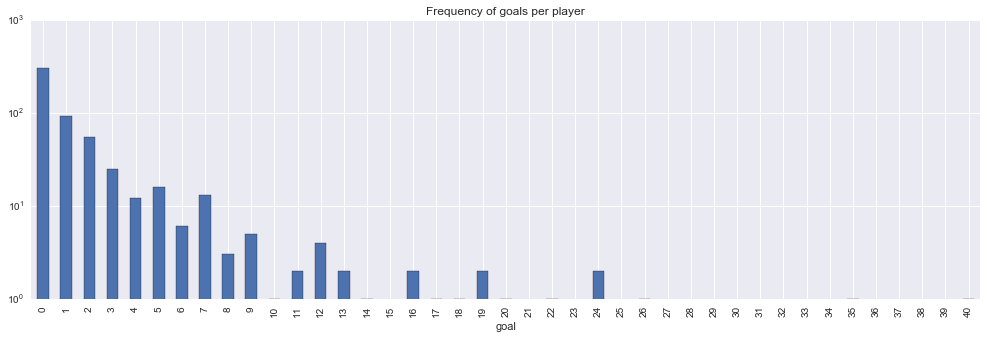

In [9]:
goals_per_player.plot.bar(
    title='Frequency of goals per player', figsize=(17, 5),
    logy=True, # logarithmic scale for y axis
)

### Are there any correlations in the data?

Build some scatter plots:

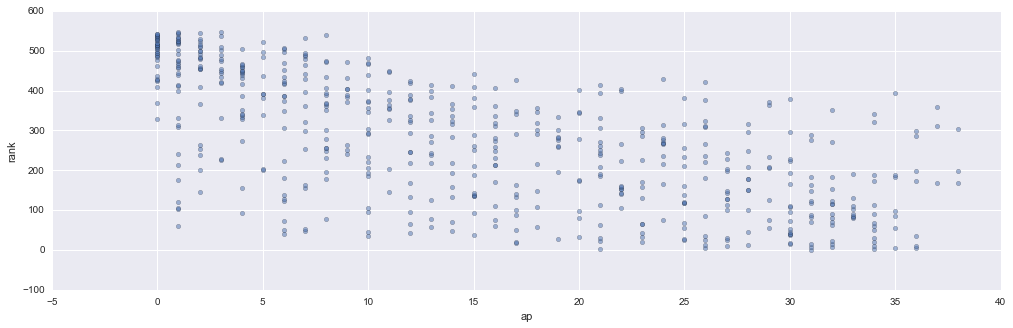

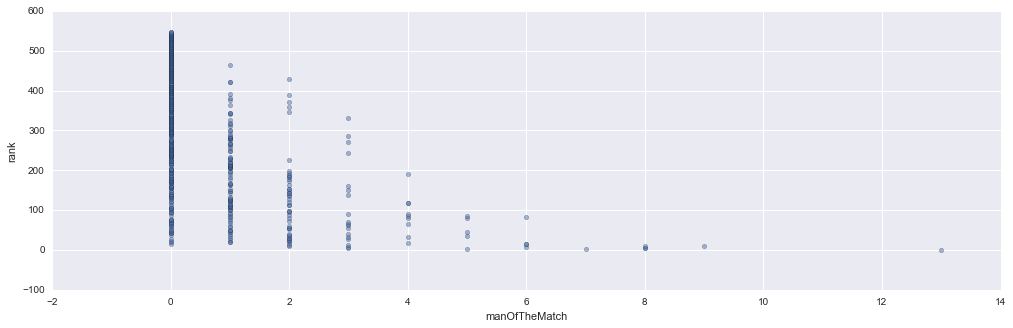

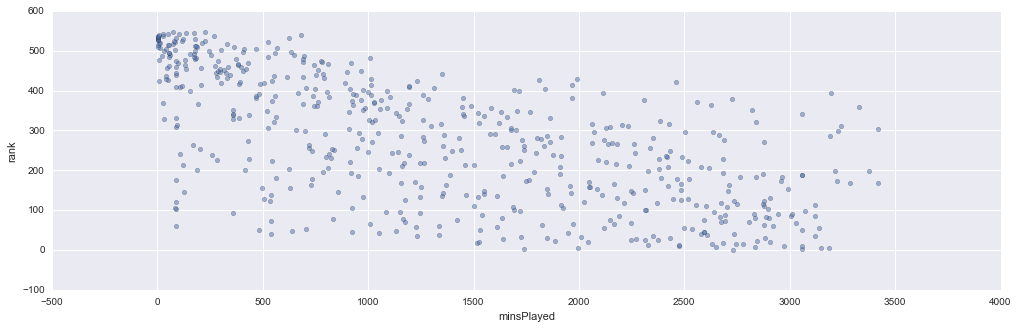

In [10]:
for col in ['ap', 'manOfTheMatch', 'minsPlayed']:
    plt.figure() # create a new plot
    df.plot.scatter(x=col, y='rank', figsize=(17, 5), alpha=0.5)

Correlation can be computed easily with the corr method

In [11]:
df[['ap', 'manOfTheMatch', 'minsPlayed', 'rank']].corr()

,ap,manOfTheMatch,minsPlayed,rank
ap,1.000000,0.505558,0.995430,-0.655912
manOfTheMatch,0.505558,1.000000,0.504174,-0.509325
minsPlayed,0.995430,0.504174,1.000000,-0.652697
rank,-0.655912,-0.509325,-0.652697,1.000000


There's a strong correlation between minsPlayed and ap (appearances)

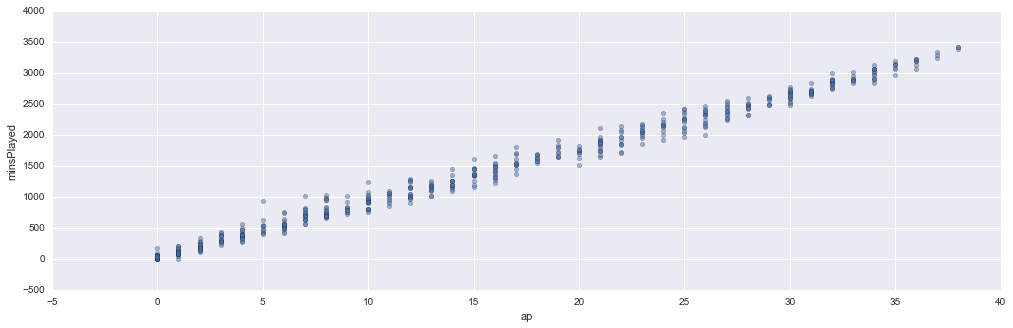

In [12]:
df.plot.scatter(x='ap', y='minsPlayed', figsize=(17, 5), alpha=0.5)

### Player countries

Where do the players come from?

In [13]:
df.rgn.unique()

array(['ar', 'br', 'gb-wls', 'uy', 'pt', 'fr', 'es', 'hr', 'de', 'co',
       'mx', 'pl', 'py', 'cr', 'ru', 'be', 'cl', nan, 'it', 've', 'pe',
       'me', 'ci', 'sn', 'ma', 'ua', 'tn', 'si', 'dk', 'cm', 'ro', 'by',
       'mq', 'rs', 'ba', 'gh', 'tr', 'ng', 'au', 'mz', 'dz', 'ml', 'ec',
       'jp', 'ao', 'gn', 'az', 'se', 'nl', 'gr', 'am', 'cg', 'ga', 'lt'], dtype=object)

What are the most common countries where players were born (for the Spanish league)?

In [14]:
regions = df.groupby('rgn').size().sort_values(ascending=False)
regions.index = [x.upper() for x in regions.index]

regions.head(10)

ES    290
AR     32
BR     23
FR     21
PT     20
UY     12
HR      8
IT      8
MA      7
CL      7
dtype: int64

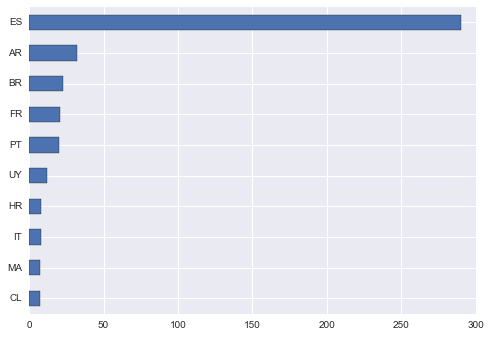

In [15]:
regions.sort_values(ascending=True).tail(10).plot.barh()